# Investigating different sources of error

> This notebook investigates the different sources of error in age inference. Besides the "bimodality" that we discuss at length in the manuscript, we also looked at whether the length of a protein and the number of domains it had correlated with node error, our main error statistic

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from itertools import combinations
%matplotlib inline

### Read in the different files with error-source information

In [2]:
lengths = pd.read_csv("lengthMapping.csv",index_col=0,names=["protLength"]).sort()
numDomains = pd.read_csv("numDomains.csv",index_col=0,names=["numDomains"]).sort()

In [3]:
nodeStats = pd.read_csv("../../nodeStats/nodeStats_HUMAN.csv",index_col=0).sort()[["Bimodality","NodeError"]]

In [4]:
lossTaxa = pd.read_csv("../../Errors/lossStats_HUMAN.csv",index_col=0).sort()[["mean"]]
lossTaxa.columns = ["meanLossTaxa"]

In [5]:
fracOverSplit = pd.read_csv("../../Errors/HUMAN_LDO_summary.csv",index_col=0).sort()
fracOverSplit.columns = ["fracOverSplit"]

### Make concatenated dataframe

In [12]:
all_stats = pd.concat([lengths,numDomains,nodeStats,lossTaxa,fracOverSplit],axis=1)
all_stats.dropna(inplace=True)
all_stats["fracOverSplit"].fillna(0,inplace=True)
all_stats = all_stats.convert_objects(convert_numeric=True)
all_stats.columns = ["Protein Length","# Domains","Bimodality",
                     "Node Error","Avg. Loss Taxa","% Oversplit"]
all_stats.head()

,Protein Length,# Domains,Bimodality,Node Error,Avg. Loss Taxa,% Oversplit
A0A0C4DH55,119,5,1.745455,6.285714,7.384615,1.000000
A0A5B9,178,2,0.500000,1.238095,3.076923,0.500000
A0AV02,714,2,1.428571,2.769231,13.307692,0.555556
A0AV96,593,4,7.000000,4.769231,10.153846,1.000000
A0AVI2,2093,4,7.202381,5.794872,9.076923,0.250000


### Scatterplot and correlation analysis

> Only bimodality correlates strongly with the node error statistic

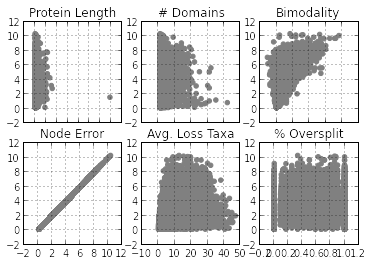

In [13]:
fig, axes = plt.subplots(2,3,sharey=False)
index = 0
for col in all_stats.columns:
    axis = axes.flat[index]
    all_stats.plot(ax=axis,kind='scatter',x=col,y='Node Error',color='grey',title=col)
    axis.set_ylabel('')
    axis.set_xlabel('')
    index += 1
    
#fig.savefig("errorScatterPlot.png",dpi=200)

In [14]:
correlations = all_stats.corr('spearman')
correlations

,Protein Length,# Domains,Bimodality,Node Error,Avg. Loss Taxa,% Oversplit
Protein Length,1.000000,0.350493,0.063828,0.077363,0.134525,0.063490
# Domains,0.350493,1.000000,0.083485,0.151862,0.066760,0.238966
Bimodality,0.063828,0.083485,1.000000,0.679006,0.061109,0.072679
Node Error,0.077363,0.151862,0.679006,1.000000,0.307054,0.089835
Avg. Loss Taxa,0.134525,0.066760,0.061109,0.307054,1.000000,-0.038085
% Oversplit,0.063490,0.238966,0.072679,0.089835,-0.038085,1.000000


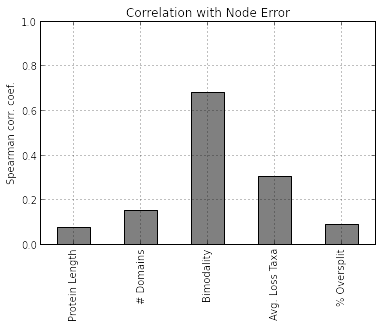

In [15]:
correlations.drop("Node Error",axis=1).ix["Node Error",].plot(
    kind='bar',color='grey',ylim=(0,1),title="Correlation with Node Error")
plt.ylabel("Spearman corr. coef.")

#plt.savefig("correlation_barPlot.svg")

In [16]:
# correlations.to_csv("errorCorrelations.csv")